In [2]:
import pandas as pd

# Try different encodings such as 'utf-8', 'latin1', 'ISO-8859-1', 'cp1252'
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        # Load the CSV file into a DataFrame with the specified encoding
        df = pd.read_csv('Reviews.csv', encoding=encoding)

        # Display the DataFrame
        print(df.head())
        break  # Break the loop if successful
    except UnicodeDecodeError:
        print(f"Failed with encoding {encoding}. Trying the next one.")


Failed with encoding utf-8. Trying the next one.
  Location_Name Located_City                      Location Location_Type  \
0    Arugam Bay   Arugam Bay  Arugam Bay, Eastern Province       Beaches   
1    Arugam Bay   Arugam Bay  Arugam Bay, Eastern Province       Beaches   
2    Arugam Bay   Arugam Bay  Arugam Bay, Eastern Province       Beaches   
3    Arugam Bay   Arugam Bay  Arugam Bay, Eastern Province       Beaches   
4    Arugam Bay   Arugam Bay  Arugam Bay, Eastern Province       Beaches   

  User_ID           User_Location User_Locale  User_Contributions Travel_Date  \
0  User 1  Dunsborough, Australia       en_US                   8     2019-07   
1  User 2      Bendigo, Australia       en_US                   4     2019-06   
2  User 3    Melbourne, Australia       en_US                  13     2019-07   
3  User 4      Ericeira, Portugal       en_US                   4     2019-06   
4  User 5          Pistoia, Italy       en_US                  14     2019-07   

       

In [3]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Location_Name         0
Located_City          0
Location              0
Location_Type         0
User_ID               0
User_Location         0
User_Locale           0
User_Contributions    0
Travel_Date           0
Published_Date        0
Rating                0
Helpful_Votes         0
Title                 0
Text                  0
dtype: int64


In [4]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)



In [5]:
# Convert date columns to datetime format with utc=True
df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], errors='coerce', utc=True)
df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce', utc=True)


In [6]:
# Fill missing values in 'Rating' with the mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Fill missing values in 'Helpful_Votes' with 0
df['Helpful_Votes'] = df['Helpful_Votes'].fillna(0)



In [7]:
# Display the cleaned DataFrame
df.head()


,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07-01 00:00:00+00:00,2019-07-31 11:53:21+00:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was profes...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06-01 00:00:00+00:00,2019-07-22 01:50:11+00:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visi..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07-01 00:00:00+00:00,2019-07-15 22:52:55+00:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, h..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06-01 00:00:00+00:00,2019-07-03 14:32:41+00:00,5,0,Sun and waves.,Good place for surf and a few stores to going ...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07-01 00:00:00+00:00,2019-07-02 21:07:02+00:00,5,0,"Great swimming, surfing, great fish aznd frien...",This place is great for surfing but even if yo...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

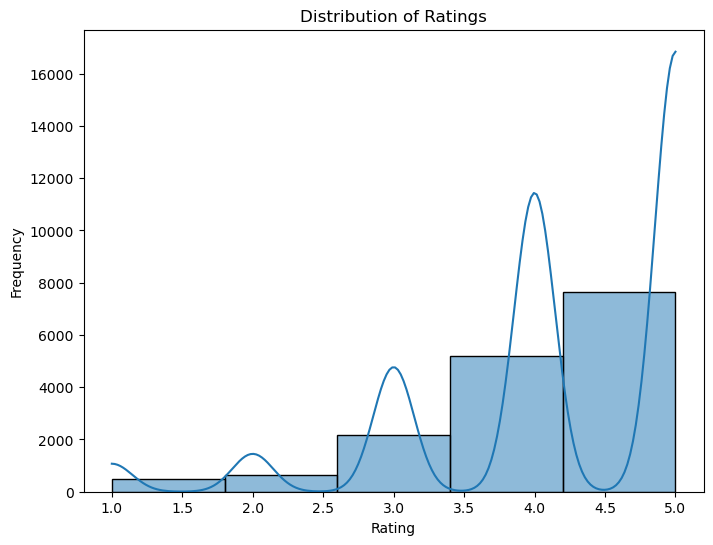

In [9]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)  # Using Seaborn for a more informative plot
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

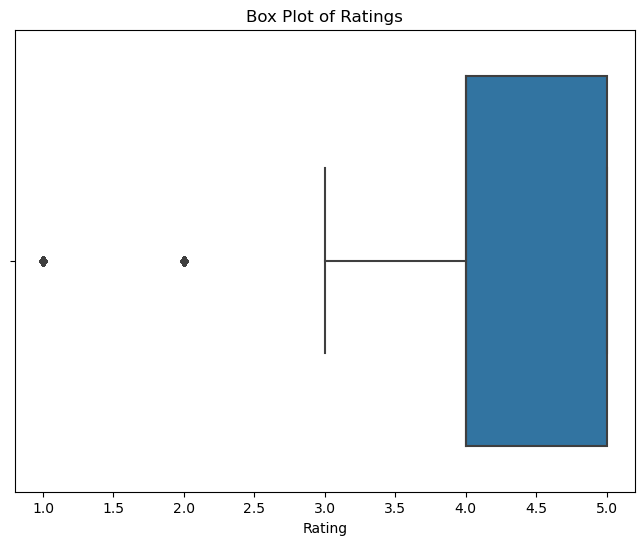

In [10]:
# Box plot of ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()


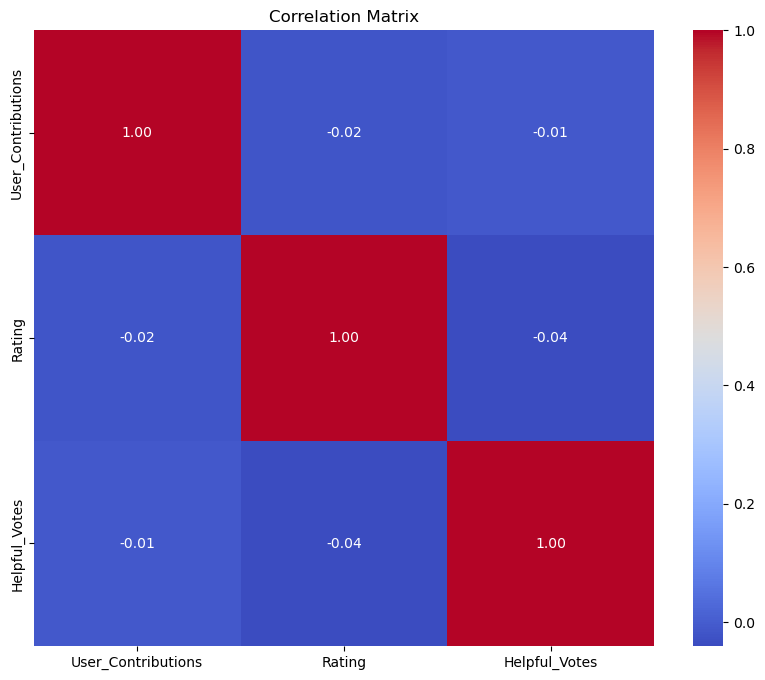

In [11]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


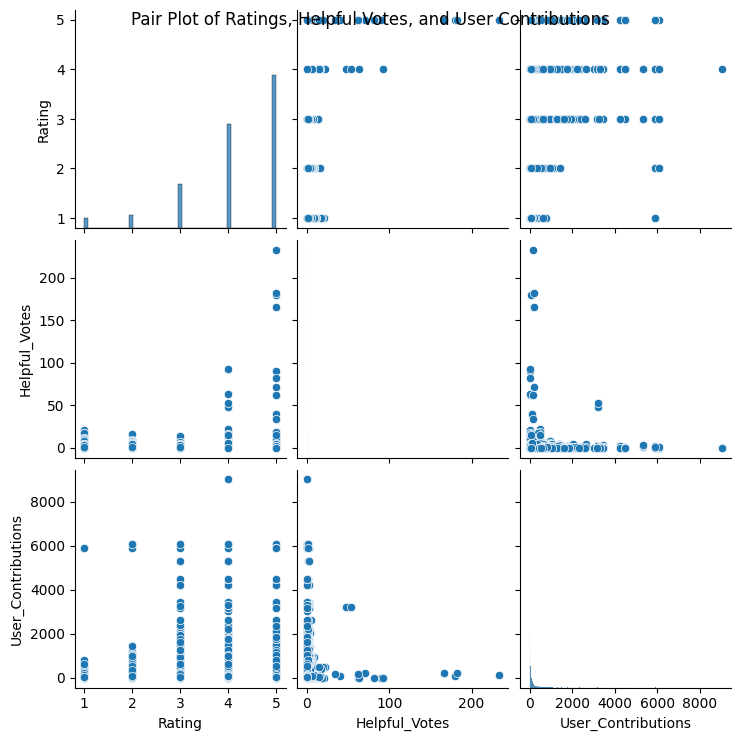

In [17]:
# Pair plot
sns.pairplot(df[['Rating', 'Helpful_Votes', 'User_Contributions']])
plt.suptitle('Pair Plot of Ratings, Helpful Votes, and User Contributions')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


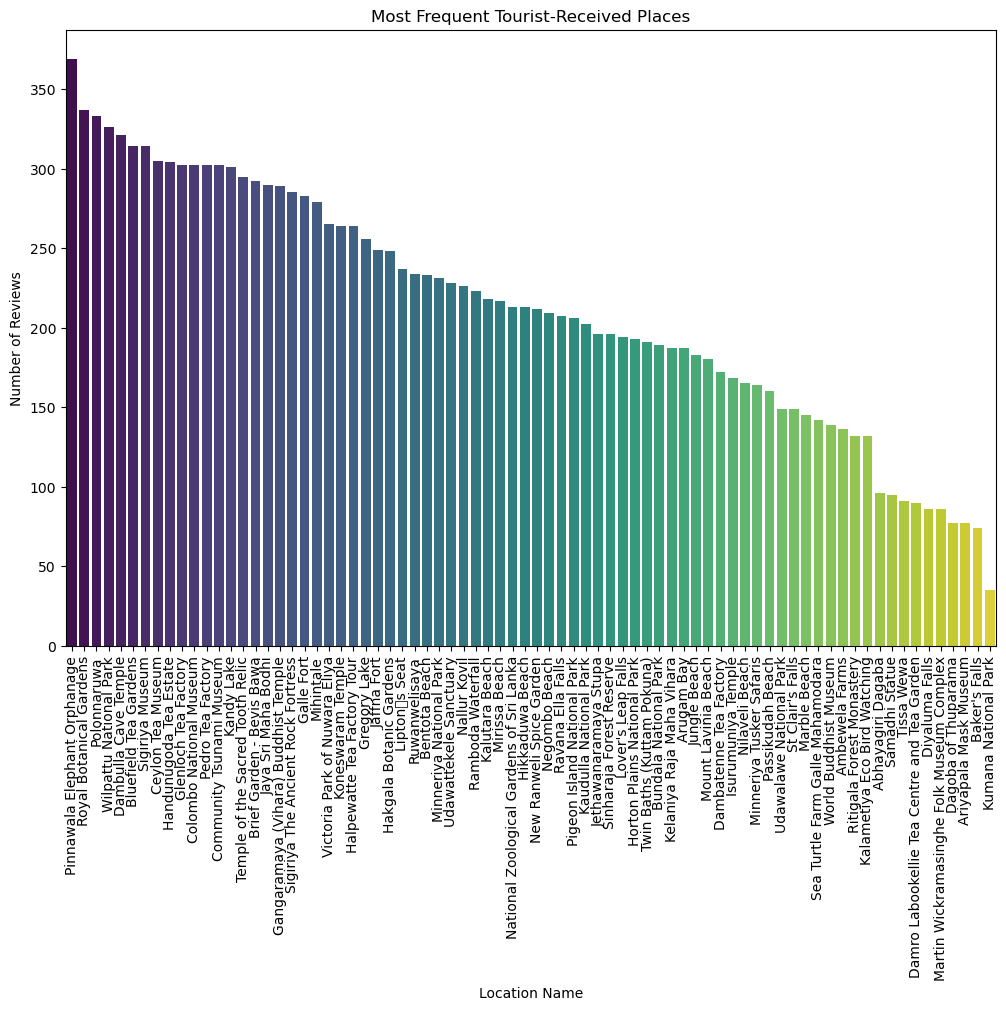

In [12]:
location_counts = df['Location_Name'].value_counts()

# Plot the most frequent tourist-received places
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Most Frequent Tourist-Received Places')
plt.xlabel('Location Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


In [13]:
df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], errors='coerce')

# Extract the year from 'Travel_Date'
df['Year'] = df['Travel_Date'].dt.year

# Filter the DataFrame for the years 2014 to 2022
years = range(2014, 2023)
for year in years:
    df_year = df[df['Year'] == year]
    
    # Group by 'Location' and sum the number of tourists for each location
    tourist_count_by_location = df_year.groupby('Location')['User_Contributions'].sum().reset_index()
    
    # Sort locations based on the total number of tourists in descending order
    tourist_count_by_location = tourist_count_by_location.sort_values(by='User_Contributions', ascending=False)

# Print the result for the current year
    print(f"\nYear {year} - Locations with most tourists:")
    print(tourist_count_by_location)


Year 2014 - Locations with most tourists:
                                            Location  User_Contributions
2               Anuradhapura, North Central Province               28317
10           Kandy, Kandy District, Central Province               15452
16                        Sigiriya, Central Province                5789
9                          Jaffna, Northern Province                5071
1     Ambalangoda, Galle District, Southern Province                4399
5                          Colombo, Western Province                3502
14                    Nuwara Eliya, Central Province                2839
15  Saliyapura, Anuradhapura, North Central Province                2815
11      Katukitula, Kandy District, Central Province                2184
0        Ahangama, Galle District, Southern Province                1890
4                         Beruwala, Western Province                1697
19                                      Uva Province                1408
8       

In [14]:
df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], errors='coerce')

# Extract the year from 'Travel_Date'
df['Year'] = df['Travel_Date'].dt.year

# Group by year and sum the number of tourists for each year
tourist_count_by_year = df.groupby('Year')['User_Contributions'].sum().reset_index()

# Find the year with the maximum total number of tourists
max_tourists_year = tourist_count_by_year.loc[tourist_count_by_year['User_Contributions'].idxmax()]

# Display the result
print(f"The year with the most tourists is {int(max_tourists_year['Year'])} with a total of {int(max_tourists_year['User_Contributions'])} tourists.")

The year with the most tourists is 2019 with a total of 863319 tourists.


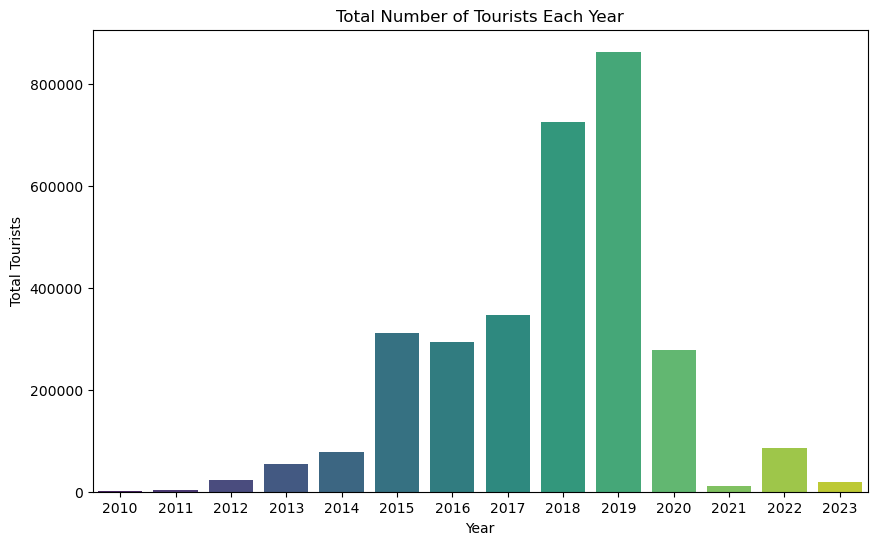

In [16]:
df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], errors='coerce')

# Extract the year from 'Travel_Date'
df['Year'] = df['Travel_Date'].dt.year

# Group by year and sum the number of tourists for each year
tourist_count_by_year = df.groupby('Year')['User_Contributions'].sum().reset_index()

# Plot the total number of tourists for each year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='User_Contributions', data=tourist_count_by_year, palette='viridis', dodge=False)
plt.title('Total Number of Tourists Each Year')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.show()

In [17]:
# Group by 'User_Location' and sum the number of tourists for each country
tourist_count_by_country = df.groupby('User_Location')['User_Contributions'].sum().reset_index()

# Sort the DataFrame by the total number of tourists in descending order
tourist_count_by_country = tourist_count_by_country.sort_values(by='User_Contributions', ascending=False)

# Display the country with the most tourists
most_tourists_country = tourist_count_by_country.iloc[0]['User_Location']
total_tourists = tourist_count_by_country.iloc[0]['User_Contributions']

print(f"The country with the most tourists is {most_tourists_country} with a total of {total_tourists} tourists.")

The country with the most tourists is London, United Kingdom with a total of 319628 tourists.


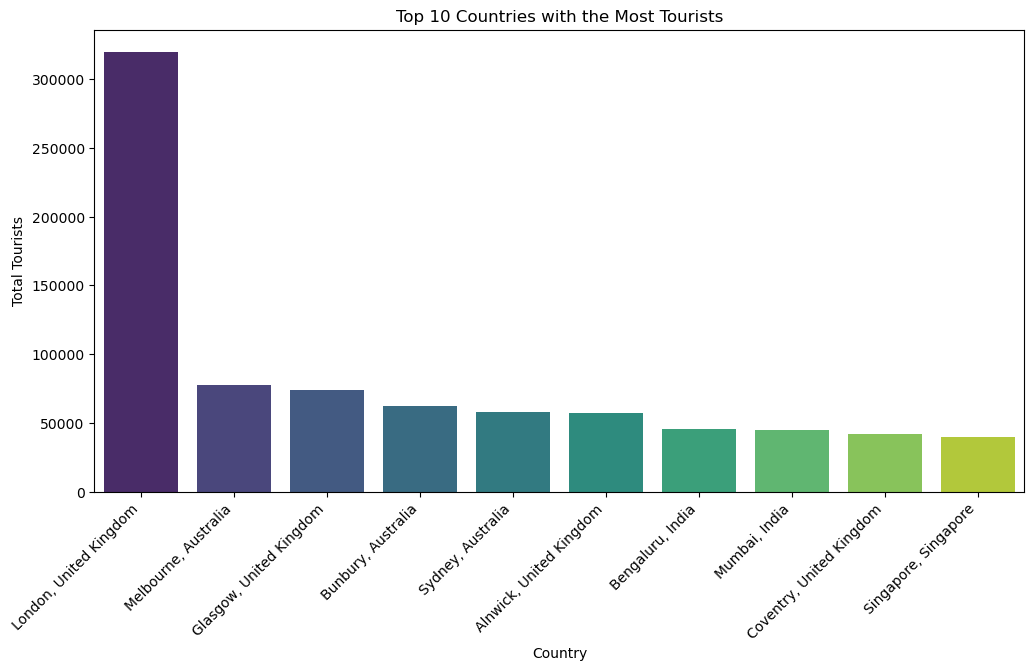

In [20]:
tourist_count_by_country = df.groupby('User_Location')['User_Contributions'].sum().reset_index()

# Sort the DataFrame by the total number of tourists in descending order
tourist_count_by_country = tourist_count_by_country.sort_values(by='User_Contributions', ascending=False)

# Plot the total number of tourists for each country
plt.figure(figsize=(12, 6))
sns.barplot(x='User_Location', y='User_Contributions', data=tourist_count_by_country.head(10), palette='viridis', dodge=False)
plt.title('Top 10 Countries with the Most Tourists')
plt.xlabel('Country')
plt.ylabel('Total Tourists')
plt.xticks(rotation=45, ha='right')
plt.show()

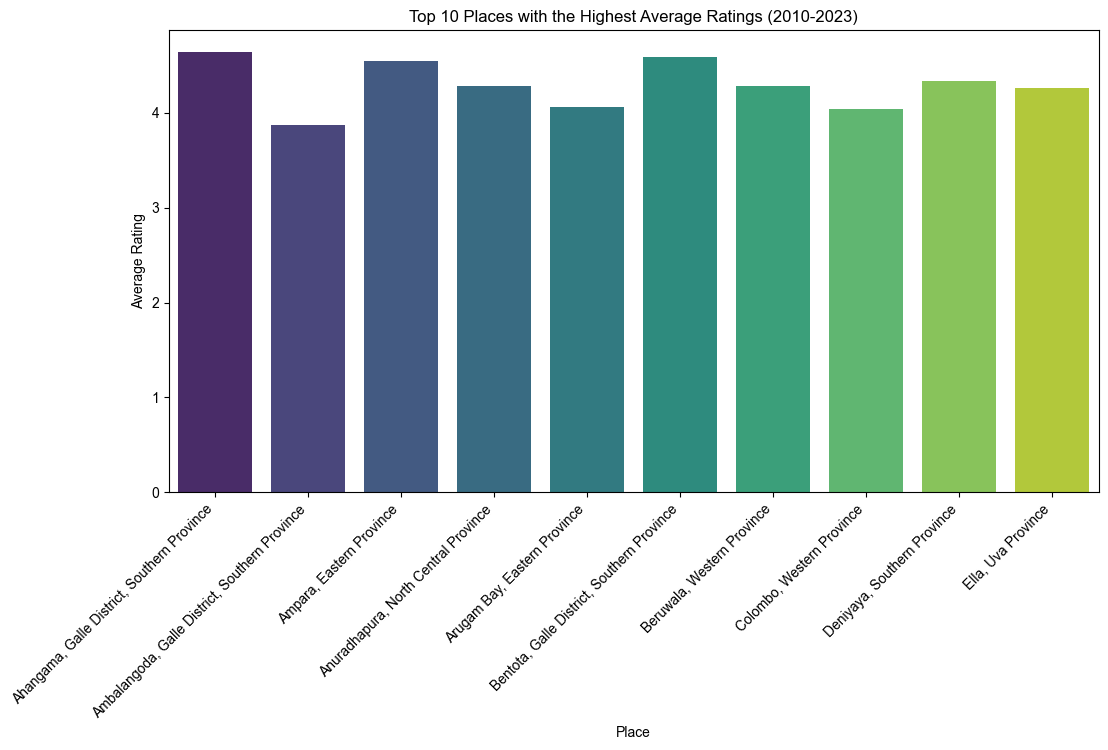

In [33]:
df['Year'] = pd.to_datetime(df['Travel_Date'], errors='coerce').dt.year

# Filter the DataFrame for the years 2010 to 2023
years = range(2010, 2024)
df_filtered = df[df['Year'].isin(years)]

# Group by 'Location' and calculate the average rating for each place
average_rating_by_place = df_filtered.groupby('Location')['Rating'].mean().reset_index()

# Plot the average rating for each place
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Rating', hue='Location', data=average_rating_by_place.head(10), palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Places with the Highest Average Ratings (2010-2023)')
plt.xlabel('Place')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
df['Year'] = pd.to_datetime(df['Travel_Date'], errors='coerce').dt.year

# Filter data for the years 2010 to 2023
years_of_interest = range(2010, 2024)
df_filtered = df[df['Year'].isin(years_of_interest)]

# Group by 'Location' and calculate the average rating for each place
average_rating_by_place = df_filtered.groupby('Location')['Rating'].mean().reset_index()

# Sort the DataFrame by average rating in descending order
average_rating_by_place = average_rating_by_place.sort_values(by='Rating', ascending=False)

# Display the result
print("Average Rating by Place:")
print(average_rating_by_place)

Average Rating by Place:
                                            Location    Rating
15           Kalametiya, Tangalle, Southern Province  4.992424
37                      Weligatta, Southern Province  4.698413
34                           Udawalawe National Park  4.677852
0        Ahangama, Galle District, Southern Province  4.638158
5         Bentota, Galle District, Southern Province  4.587983
26      Peradeniya, Kandy District, Central Province  4.572700
16                        Kalkudah, Eastern Province  4.562500
2                           Ampara, Eastern Province  4.542857
20                            Koslanda, Uva Province  4.488372
11                  Habarana, North Central Province  4.449331
32                  Tissamaharama, Southern Province  4.428571
28               Polonnaruwa, North Central Province  4.423423
10          Galle, Galle District, Southern Province  4.422701
24                            North Central Province  4.411255
13      Hikkaduwa, Galle Distr

In [22]:
df['Year'] = pd.to_datetime(df['Travel_Date'], errors='coerce').dt.year

# Filter data for the years 2010 to 2023 and for Arugam Bay
years_of_interest = range(2010, 2024)
arugam_bay_data = df[(df['Year'].isin(years_of_interest)) & (df['Location_Name'] == 'Arugam Bay')]

# Calculate the total number of tourists for Arugam Bay for each year
tourist_count_by_year = arugam_bay_data.groupby('Year')['User_Contributions'].sum().reset_index()

# Display the result
print("Total Tourists in Arugam Bay by Year:")
print(tourist_count_by_year)

Total Tourists in Arugam Bay by Year:
    Year  User_Contributions
0   2011                 288
1   2012                 237
2   2013                 581
3   2014                 278
4   2015                 493
5   2016                 880
6   2017                2869
7   2018                2645
8   2019                 561
9   2020                  30
10  2022                  92


In [23]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       User_Contributions        Rating  Helpful_Votes          Year
count        16156.000000  16156.000000   16156.000000  16156.000000
mean           191.624845      4.167492       0.709458   2017.598106
std            500.100421      1.006840       3.672513      1.971124
min              1.000000      1.000000       0.000000   2010.000000
25%             18.000000      4.000000       0.000000   2016.000000
50%             54.000000      4.000000       0.000000   2018.000000
75%            155.000000      5.000000       1.000000   2019.000000
max           9010.000000      5.000000     233.000000   2023.000000


In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Location_Name         0
Located_City          0
Location              0
Location_Type         0
User_ID               0
User_Location         0
User_Locale           0
User_Contributions    0
Travel_Date           0
Published_Date        0
Rating                0
Helpful_Votes         0
Title                 0
Text                  0
Year                  0
dtype: int64


In [25]:
print("\nUnique Values:")
print(df['Location_Name'].unique())
print(df['User_Location'].unique())


Unique Values:
['Arugam Bay' 'Bentota Beach' 'Hikkaduwa Beach' 'Jungle Beach'
 'Kalutara Beach' 'Marble Beach' 'Mirissa Beach' 'Mount Lavinia Beach'
 'Negombo Beach' 'Nilaveli Beach' 'Passikudah Beach' 'Gregory Lake'
 'Kandy Lake' 'Tissa Wewa' 'Twin Baths (Kuttam Pokuna)' 'Ambewela Farms'
 'Bluefield Tea Gardens' 'Dambatenne Tea Factory'
 'Damro Labookellie Tea Centre and Tea Garden' 'Glenloch Tea Factory'
 'Halpewatte Tea Factory Tour' 'Handunugoda Tea Estate'
 'Pedro Tea Factory' 'Brief Garden - Bevis Bawa' 'Hakgala Botanic Gardens'
 'New Ranweli Spice Garden' 'Royal Botanical Gardens'
 'Victoria Park of Nuwara Eliya' 'Galle Fort' 'Jaffna Fort'
 'Lipton\x92s Seat' 'Polonnaruwa' 'Ritigala Forest Monastery'
 'Sigiriya The Ancient Rock Fortress' 'Ariyapala Mask Museum'
 'Ceylon Tea Museum' 'Colombo National Museum' 'Community Tsunami Museum'
 'Martin Wickramasinghe Folk Museum Complex' 'Sigiriya Museum'
 'World Buddhist Museum' 'Bundala National Park'
 'Horton Plains National Park' 'Ka

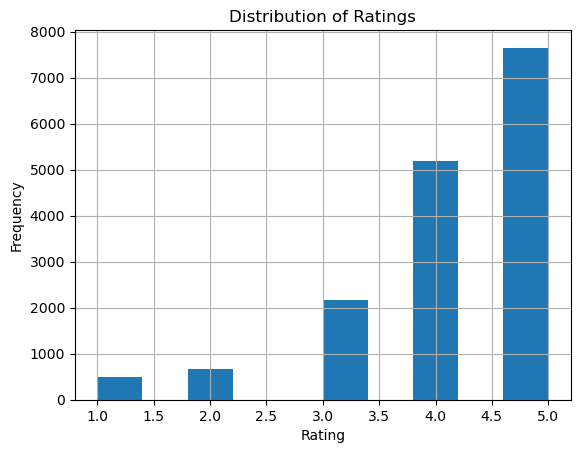

In [26]:
df['Rating'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [27]:
#Convert 'Travel_Date' and 'Published_Date' to datetime format
df['Travel_Date'] = pd.to_datetime(df['Travel_Date'], errors='coerce')
df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce')

In [28]:
df_encoded = pd.get_dummies(df, columns=['Location_Name', 'Located_City', 'User_Location', 'User_Locale'])

In [29]:
# Display the columns of the encoded DataFrame
print("Encoded DataFrame Columns:")
print(df_encoded.columns)



Encoded DataFrame Columns:
Index(['Location', 'Location_Type', 'User_ID', 'User_Contributions',
       'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title',
       'Text',
       ...
       'User_Locale_ru_RU', 'User_Locale_sk', 'User_Locale_sk_SK',
       'User_Locale_sr', 'User_Locale_sv', 'User_Locale_sv_SE',
       'User_Locale_tr', 'User_Locale_tr_TR', 'User_Locale_vi',
       'User_Locale_zh_TW'],
      dtype='object', length=3546)


In [32]:
# Display the column names of the DataFrame
print(df.columns)


Index(['Location_Name', 'Located_City', 'Location', 'Location_Type', 'User_ID',
       'User_Location', 'User_Locale', 'User_Contributions', 'Travel_Date',
       'Published_Date', 'Rating', 'Helpful_Votes', 'Title', 'Text', 'Year'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


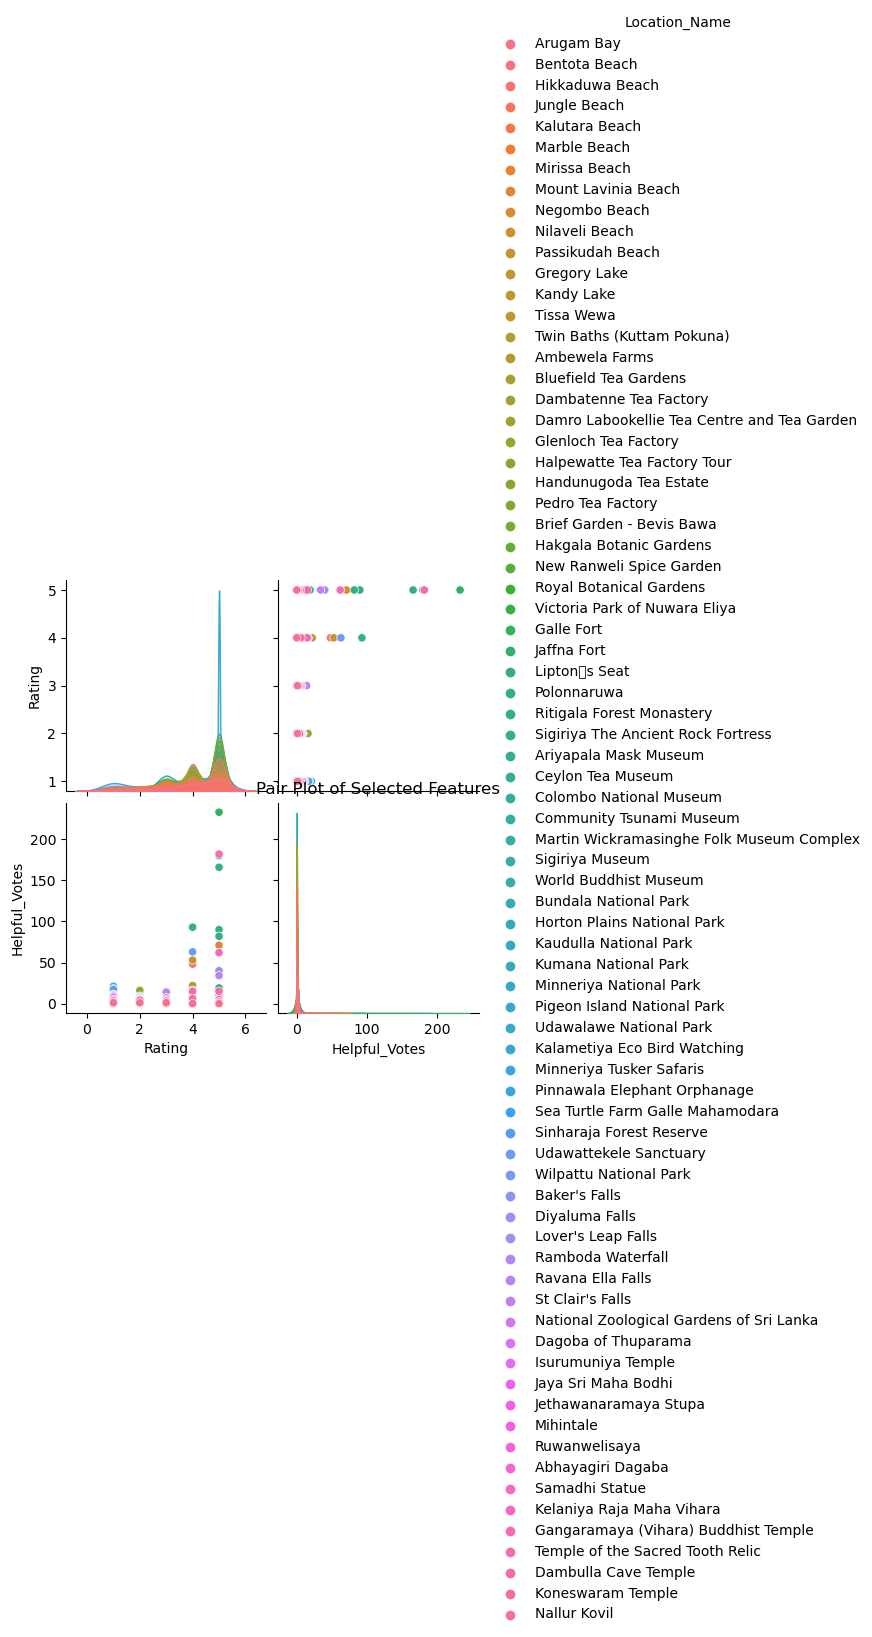

In [36]:
# Use the original column names before one-hot encoding
selected_features = ['Location_Name', 'Located_City', 'Rating', 'Helpful_Votes']
df_selected = df[selected_features]

# Explore relationships between features
sns.pairplot(df_selected, hue='Location_Name')
plt.title('Pair Plot of Selected Features')
plt.show()


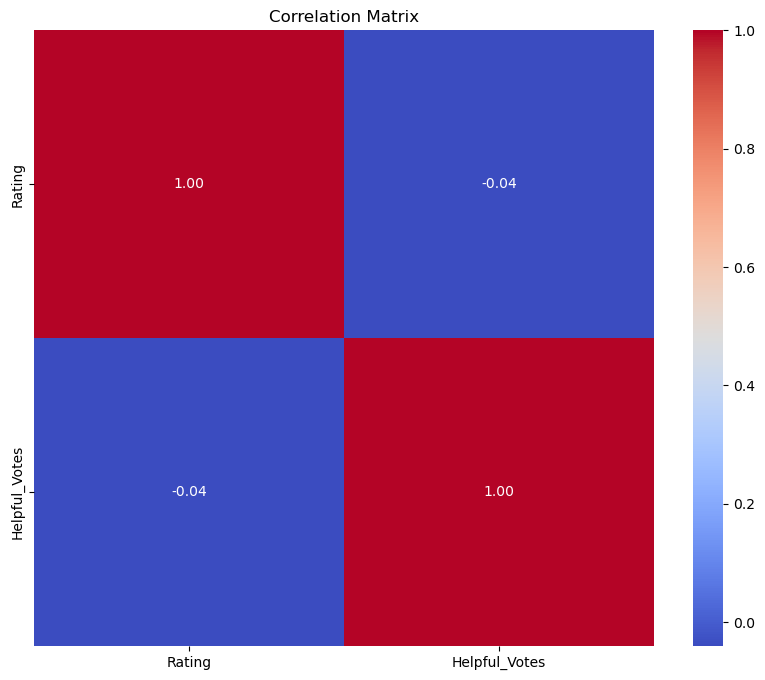

In [37]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df_selected.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_selected[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [38]:
# Analyze the average rating for each location
average_rating_by_location = df_selected.groupby('Location_Name')['Rating'].mean().reset_index()
average_rating_by_location = average_rating_by_location.sort_values(by='Rating', ascending=False)
print("Average Rating by Location:")
print(average_rating_by_location)

Average Rating by Location:
                               Location_Name    Rating
31              Kalametiya Eco Bird Watching  4.992424
8                      Bundala National Park  4.698413
71                   Udawalawe National Park  4.677852
11                  Community Tsunami Museum  4.665563
65        Sigiriya The Ancient Rock Fortress  4.645614
..                                       ...       ...
30                              Jungle Beach  3.535519
55              Pinnawala Elephant Orphanage  3.420054
13                    Dambatenne Tea Factory  3.360465
48  National Zoological Gardens of Sri Lanka  3.122066
49                             Negombo Beach  3.119617

[76 rows x 2 columns]


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9892266953251595


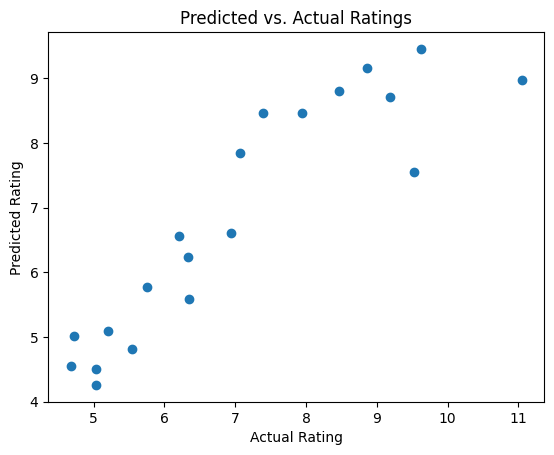

In [43]:
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

In [45]:
import matplotlib.font_manager

print([f.name for f in matplotlib.font_manager.fontManager.ttflist])


['DejaVu Sans', 'STIXGeneral', 'DejaVu Sans Display', 'STIXSizeOneSym', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'cmr10', 'STIXSizeThreeSym', 'STIXSizeFiveSym', 'STIXGeneral', 'DejaVu Serif', 'cmex10', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmtt10', 'STIXSizeFourSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'cmb10', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXNonUnicode', 'cmsy10', 'DejaVu Sans', 'STIXNonUnicode', 'cmmi10', 'STIXNonUnicode', 'DejaVu Serif Display', 'cmss10', 'STIXGeneral', 'Calisto MT', 'Kushpoo', 'TAM Auvaiyar', 'Agency FB', 'Franklin Gothic Medium Cond', 'Curlz MT', 'HoloLens MDL2 Assets', 'NelumPC', 'Shanmugapriya', 'Georgia', 'Lucida Fax', 'Eelamlead', 'Freestyle Script', 'K', 'Courier New', 'Priya', 'Segoe MDL2 Assets', 'Lucida Bright', 'Consolas', 'Microsoft Uighur', 'Tw Cen MT', 'Mistral', 'Lucida Handwriting', 'Times New Roman', 'Arial',

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [47]:
features = df[['User_Contributions', 'Rating']]


In [49]:
target = df['Helpful_Votes']


In [50]:
print("Features:")
print(features.head())

print("\nTarget:")
print(target.head())


Features:
   User_Contributions  Rating
0                   8       5
1                   4       4
2                  13       5
3                   4       5
4                  14       5

Target:
0    1
1    0
2    0
3    0
4    0
Name: Helpful_Votes, dtype: int64


In [52]:
unique_values = df['Helpful_Votes'].unique()


In [53]:
print("Unique Values of 'Helpful_Votes':")
print(unique_values)


Unique Values of 'Helpful_Votes':
[  1   0   4   9   8   3   2   6   7  12  13  48  10   5  17  71  14  62
  53  22  16  11 233  90 166  19  82  93 180  21  18  63  40  34  15 182]


In [55]:
# Check the columns in the DataFrame
print(df_encoded.columns)

# Select relevant features
features = df_encoded[['Location', 'Travel_Date', 'Rating', 'Helpful_Votes']]

# Remove unnecessary columns
# Ensure 'Text' is present in the columns before attempting to drop it
if 'Text' in features.columns:
    features = features.drop(['Text'], axis=1)
else:
    print("'Text' column not found in features.")

# Continue with the rest of your code...



Index(['Location', 'Location_Type', 'User_ID', 'User_Contributions',
       'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title',
       'Text',
       ...
       'User_Locale_ru_RU', 'User_Locale_sk', 'User_Locale_sk_SK',
       'User_Locale_sr', 'User_Locale_sv', 'User_Locale_sv_SE',
       'User_Locale_tr', 'User_Locale_tr_TR', 'User_Locale_vi',
       'User_Locale_zh_TW'],
      dtype='object', length=3546)
'Text' column not found in features.


In [57]:
# Check the column names in the DataFrame
print(df_encoded.columns)

# Assuming 'Number_of_Tourists' might have a different name or doesn't exist
# Adjust the column name accordingly based on your dataset
# For example, if the column represents the number of tourists, find the corresponding column name
# Then use it to define your target variable
target_column_name = 'Number_of_Tourists'

# Check if the target column exists in the DataFrame
if target_column_name in df_encoded.columns:
    target = df_encoded[target_column_name]
else:
    print(f"'{target_column_name}' column not found in the DataFrame. Please verify the column name.")

# Continue with the rest of your code...


Index(['Location', 'Location_Type', 'User_ID', 'User_Contributions',
       'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title',
       'Text',
       ...
       'User_Locale_ru_RU', 'User_Locale_sk', 'User_Locale_sk_SK',
       'User_Locale_sr', 'User_Locale_sv', 'User_Locale_sv_SE',
       'User_Locale_tr', 'User_Locale_tr_TR', 'User_Locale_vi',
       'User_Locale_zh_TW'],
      dtype='object', length=3546)
'Number_of_Tourists' column not found in the DataFrame. Please verify the column name.


In [58]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [62]:
print(df.columns)


Index(['Location_Name', 'Located_City', 'Location', 'Location_Type', 'User_ID',
       'User_Location', 'User_Locale', 'User_Contributions', 'Travel_Date',
       'Published_Date', 'Rating', 'Helpful_Votes', 'Title', 'Text', 'Year'],
      dtype='object')


In [48]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [50]:
import pickle

with open('model_pickle', 'rb') as file:
    loaded_model = pickle.load(file)


In [51]:
for column in X.columns:
    print(column)

User_Contributions
Helpful_Votes
